# Play Store Apps
Web scraped data of 10k Play Store apps for analysing. 

Link on Kaggle: <https://www.kaggle.com/datasets/whenamancodes/play-store-apps> 

### Import of libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Parsing to pandas df and exploring dataset's structure

In [3]:
# parsing csv as pandas dataframe
df = pd.read_csv("googleplaystore.csv")
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [4]:
df.shape

(10841, 13)

As we see from the sell above, the dataset has 10841 rows and 13 columns. Let us look at column names and first rows: 

In [5]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


As we see, the data consists of App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Version and Android Version. For developing a recommendation system, we are interested in such fields as **Category**, **Rating** and **Genres**. We will try to recommend the user the apps in the same genre and category as the ones they already like. Then we will select those with the best ratings. 

### Categories

In [6]:
categories = df["Category"].value_counts()
print("Most popular categories:\n", categories[:5], "\n")
print("Categories in total:", len(categories))

Most popular categories:
 Category
FAMILY      1972
GAME        1144
TOOLS        843
MEDICAL      463
BUSINESS     460
Name: count, dtype: int64 

Categories in total: 34


In this dataset, apps fall into 34 categories, the most popular among which are family, game, tools, medical and business. 

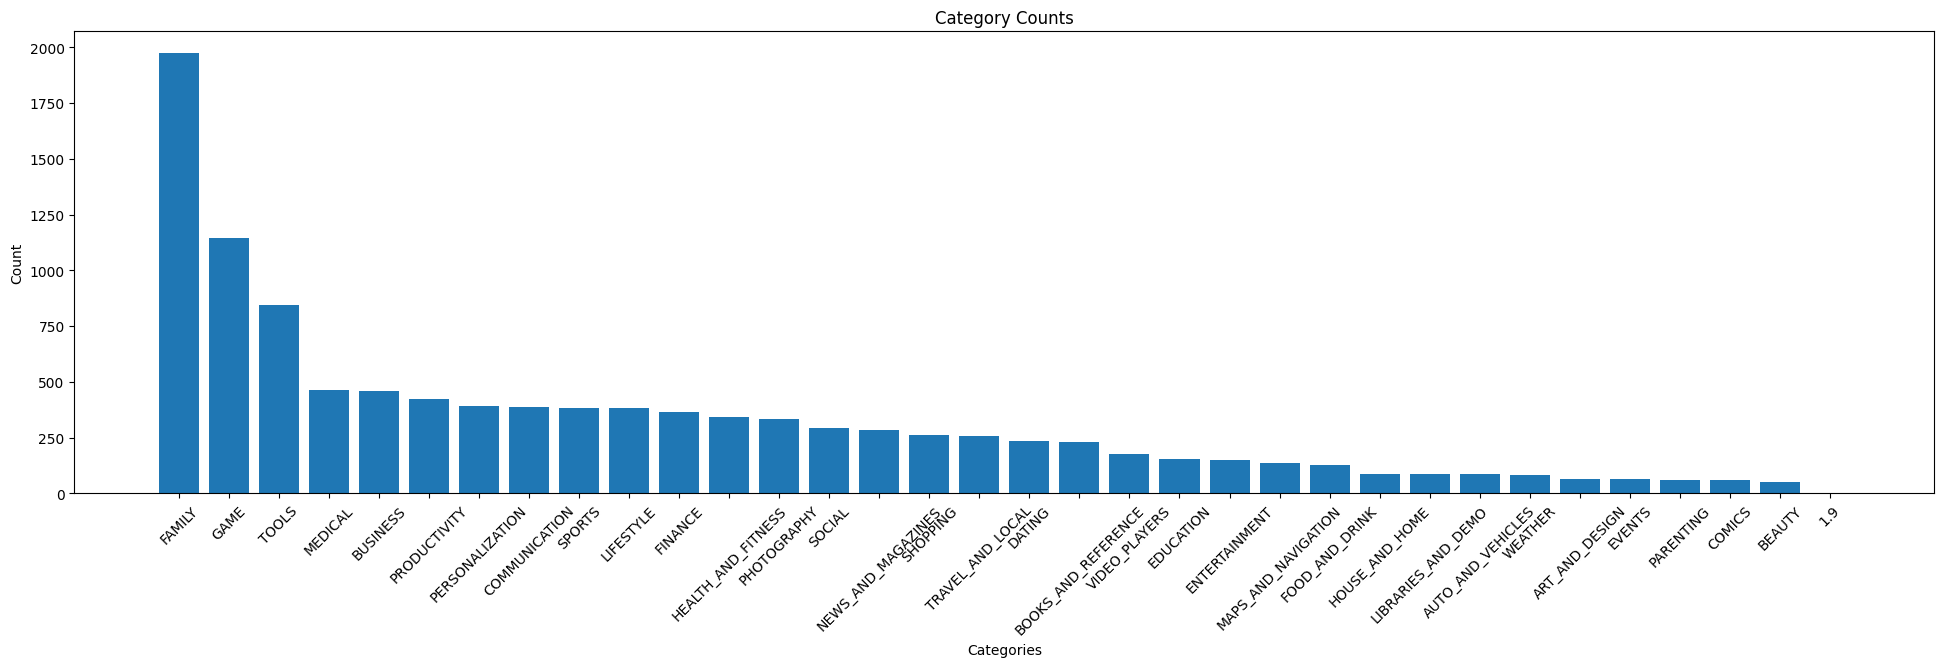

In [7]:
plt.figure(figsize=(24, 6)) 
plt.bar(categories.index, categories)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Category Counts')
plt.xticks(rotation=45)
plt.show()

In [11]:
categories_lst = list(zip(df["App"], df["Category"]))
print(categories_lst)

[('Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN'), ('Coloring book moana', 'ART_AND_DESIGN'), ('U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN'), ('Sketch - Draw & Paint', 'ART_AND_DESIGN'), ('Pixel Draw - Number Art Coloring Book', 'ART_AND_DESIGN'), ('Paper flowers instructions', 'ART_AND_DESIGN'), ('Smoke Effect Photo Maker - Smoke Editor', 'ART_AND_DESIGN'), ('Infinite Painter', 'ART_AND_DESIGN'), ('Garden Coloring Book', 'ART_AND_DESIGN'), ('Kids Paint Free - Drawing Fun', 'ART_AND_DESIGN'), ('Text on Photo - Fonteee', 'ART_AND_DESIGN'), ('Name Art Photo Editor - Focus n Filters', 'ART_AND_DESIGN'), ('Tattoo Name On My Photo Editor', 'ART_AND_DESIGN'), ('Mandala Coloring Book', 'ART_AND_DESIGN'), ('3D Color Pixel by Number - Sandbox Art Coloring', 'ART_AND_DESIGN'), ('Learn To Draw Kawaii Characters', 'ART_AND_DESIGN'), ('Photo Designer - Write your name with shapes', 'ART_AND_DESIGN'), ('350 Diy Room Decor Ideas', 'ART_AND_DESIGN'), ('Fli

### Genres

In [9]:
genres = df["Genres"].value_counts()
print("Most popular genres:\n", genres[:5], "\n")
print("Genres in total:", len(genres))

Most popular genres:
 Genres
Tools            842
Entertainment    623
Education        549
Medical          463
Business         460
Name: count, dtype: int64 

Genres in total: 120


In this dataset, apps fall into 120 genres, the most popular among which are tools, entertainment, education, medical and business. We see that genres are in some way overlapping with categories.

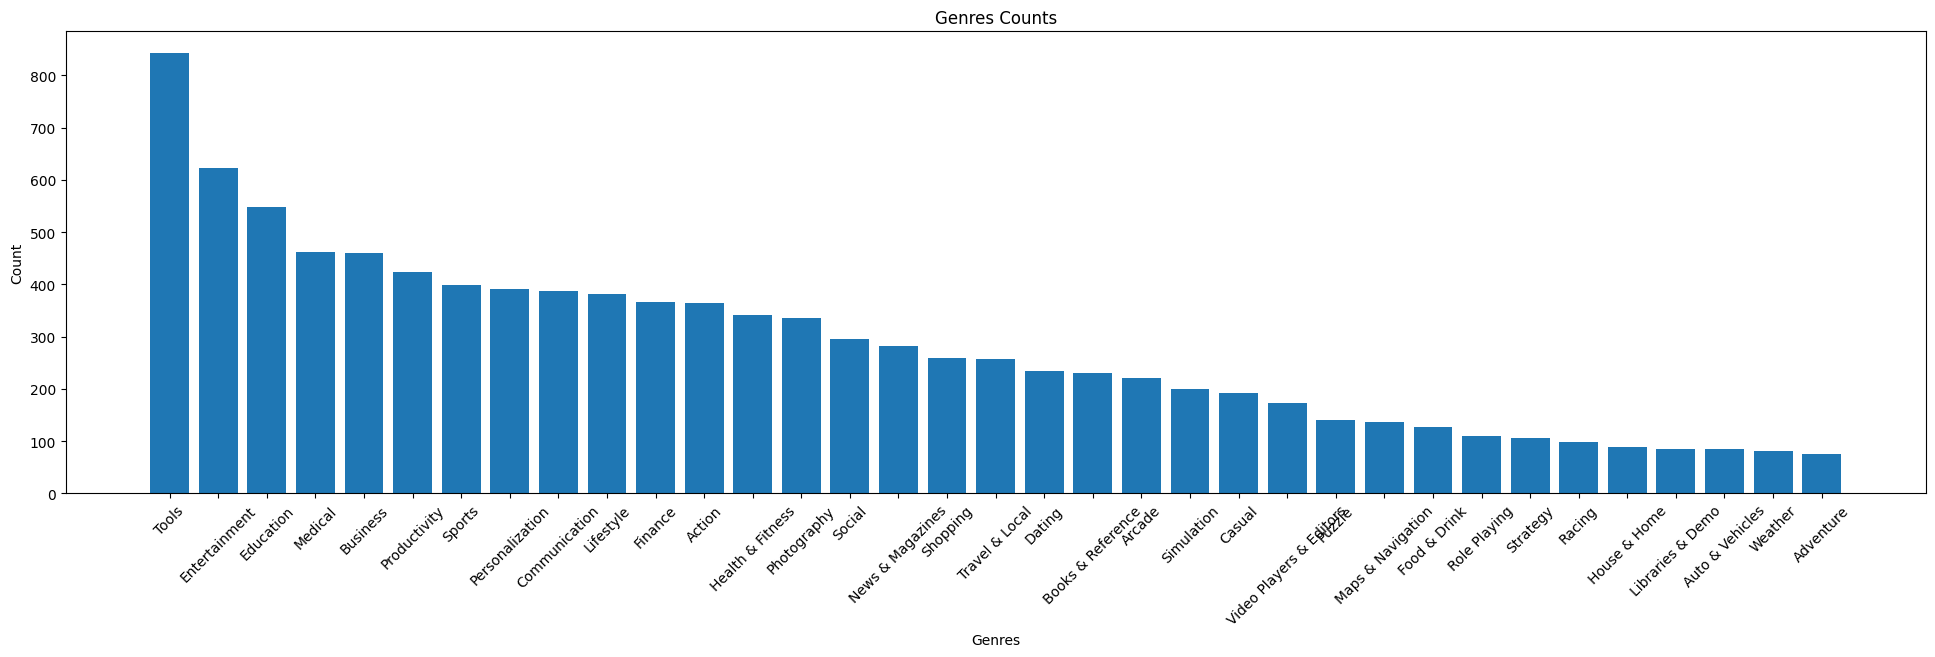

In [10]:
plt.figure(figsize=(24, 6)) 
plt.bar(genres[:35].index, genres[:35])
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Genres Counts')
plt.xticks(rotation=45)
plt.show()

This bar chart contains only first 35 most popular genres to make it look more elegant.